In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv(r'D:\blackfriday_data\train_oSwQCTC\train.csv')

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


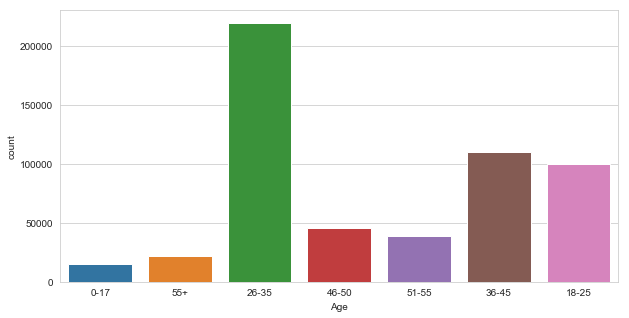

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df_train['Age'])

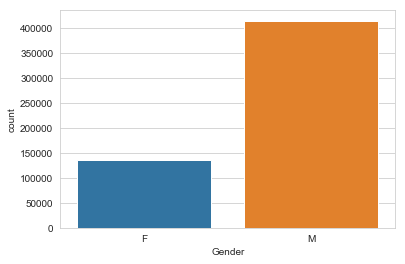

In [7]:
sns.countplot(df_train['Gender'])

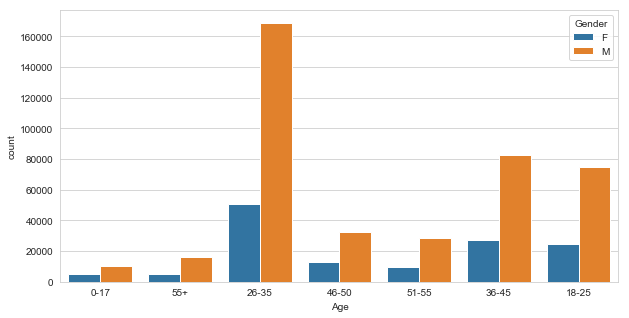

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df_train['Age'],hue='Gender',data=df_train)

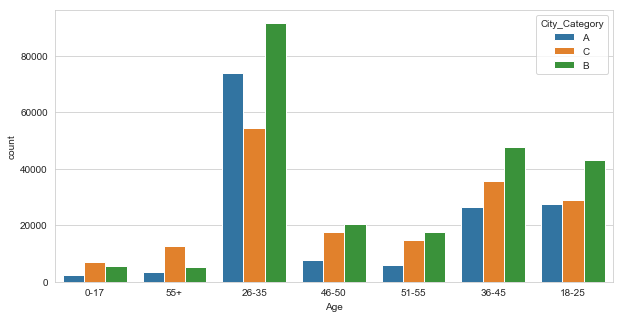

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df_train['Age'],hue=df_train['City_Category'])

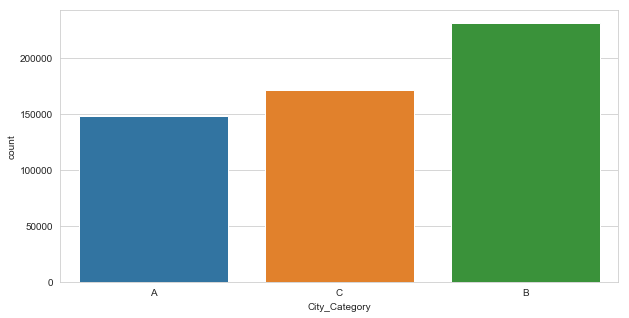

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df_train['City_Category'])

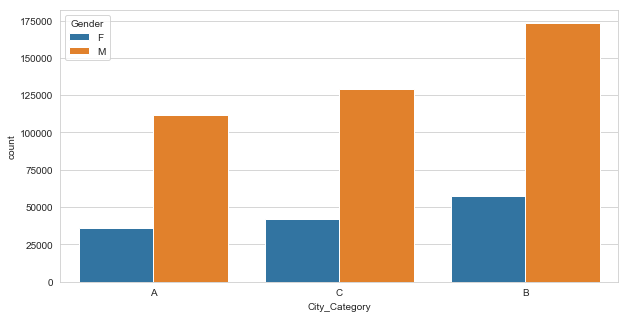

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df_train['City_Category'],hue=df_train['Gender'])

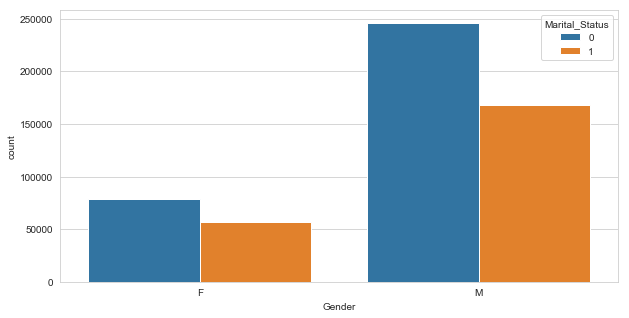

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df_train['Gender'],hue=df_train['Marital_Status'])

In [13]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
df_train['Age']=pd.get_dummies(df_train['Age'])
df_train['Gender']=pd.get_dummies(df_train['Gender'])
df_train['City_Category']=pd.get_dummies(df_train['City_Category'])

In [15]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,1,2,0,3,NaN,NaN,8370
1,1000001,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,1,10,1,2,0,12,NaN,NaN,1422
3,1000001,P00085442,1,1,10,1,2,0,12,14.0,NaN,1057
4,1000002,P00285442,0,0,16,0,4+,0,8,NaN,NaN,7969


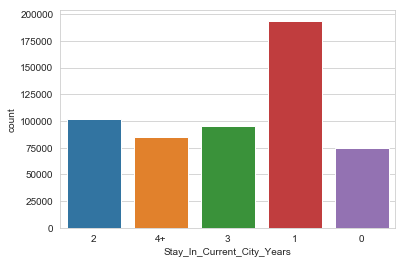

In [16]:
sns.countplot(df_train['Stay_In_Current_City_Years'])

In [17]:
df_train['Product_Category_2']=df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mean())
df_train['Product_Category_3']=df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mean())

In [18]:
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].replace({'4+':4})
#df_train['Age']=df_train['Age'].replace({'55+': 55})

In [80]:
X=df_train.drop(['Purchase','Product_ID'],axis=1)
Y=df_train['Purchase']

In [81]:
X.isnull().sum(),Y.isnull().sum()

(User_ID                       0
 Gender                        0
 Age                           0
 Occupation                    0
 City_Category                 0
 Stay_In_Current_City_Years    0
 Marital_Status                0
 Product_Category_1            0
 Product_Category_2            0
 Product_Category_3            0
 dtype: int64, 0)

In [82]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X,Y,test_size = 0.20 ,random_state=1)

In [96]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 150, oob_score='TRUE', n_jobs = -1,random_state =40,max_features = "auto", min_samples_leaf = 50) 
regressor.fit(X_train, Y_train)  
y_pred = regressor.predict(X_test)

In [94]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))  


Mean Absolute Error: 2131.943683167775
Mean Squared Error: 8232608.7694961075
Root Mean Squared Error: 2869.252301470909


In [95]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test,y_pred))

Variance score: 0.67


In [86]:
importances_rf = regressor.feature_importances_
importances_rf

array([2.48536551e-02, 1.52681367e-03, 1.70381910e-04, 9.02892877e-03,
       2.17307490e-03, 4.35249616e-03, 2.03029628e-03, 9.26621572e-01,
       1.56607487e-02, 1.35820323e-02])

In [55]:
indices_rf = np.argsort(importances_rf)[::-1]

In [56]:
indices_rf

array([7, 0, 8, 9, 3, 5, 4, 6, 1, 2], dtype=int64)

In [57]:
Y_test.head()

470060     8013
395974     2769
14234      5952
72183      9914
272536    15472
Name: Purchase, dtype: int64

In [58]:
y_pred[0:10]

array([ 7065.43806985,  2734.90566297,  5985.85325812,  7920.11422599,
       14376.55307691,  6397.37006539,  6826.43917173, 14065.10549185,
       14110.22322291, 10163.9052554 ])

In [59]:
residual=Y_test-y_pred

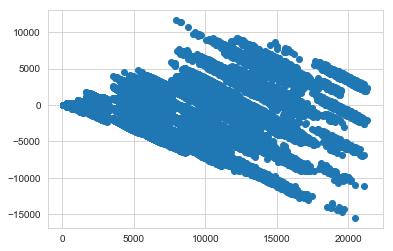

In [60]:
plt.scatter(y_pred,residual)

In [61]:
df_test=pd.read_csv(r'D:\blackfriday_data\test_HujdGe7\test.csv')

In [62]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [63]:
df_test['Age']=pd.get_dummies(df_test['Age'])
df_test['Gender']=pd.get_dummies(df_test['Gender'])
df_test['City_Category']=pd.get_dummies(df_test['City_Category'])

In [64]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,0,0,7,0,2,1,1,11.0,NaN
1,1000009,P00113442,0,0,17,0,0,0,3,5.0,NaN
2,1000010,P00288442,1,0,1,0,4+,1,5,14.0,NaN
3,1000010,P00145342,1,0,1,0,4+,1,4,9.0,NaN
4,1000011,P00053842,1,0,1,0,1,0,4,5.0,12.0


In [65]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [66]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())
df_test['Product_Category_3']=df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mean())

In [67]:
df_test['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].replace({'4+':4})

In [68]:
x_test=df_test.drop('Product_ID',axis=1)

In [69]:
predictions = regressor.predict(x_test)

In [70]:
predictions[1:10]

array([10552.72815908,  6750.71738253,  2602.89739071,  2736.32583714,
       11927.24753563, 13582.86153585, 11090.90016921, 18156.64570973,
        6115.5451565 ])

In [72]:
df = pd.DataFrame({'User_ID': df_test['User_ID'],'Product_ID':df_test['Product_ID'], 'Purchase':predictions.flatten()})
df.to_csv("submission_blackfriday3.csv")

In [ ]:
#GradientBoostingRegressor


In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
model = GradientBoostingRegressor(n_estimators=100,max_depth=4)

In [ ]:
model.fit(X_train, Y_train)  
y_pred_GB = model.predict(X_test)

In [100]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_GB))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_GB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_GB)))  


Mean Absolute Error: 2195.1428007146806
Mean Squared Error: 8497910.607736798
Root Mean Squared Error: 2915.11759758278
